# Análisis de Datos de Egresos Hospitalarios 2024

4. Relación entre contaminantes ambientales y distribución de egresos hospitalarios en Chile

Fuente de datos: egresos hospitalarios DEIS 

Variable utilizar: Egresos donde las enfermedades podrían estar causadas por contaminantes ambientales

In [2]:
# Importar librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

## 1. Carga y Preparación de Datos

### Carga de todos los años de egresos hospitalarios (2018-2024)

In [3]:
# Cargar todos los años de egresos hospitalarios
ruta_egresos = "Egresos"
archivos = [f for f in os.listdir(ruta_egresos) if f.endswith('.csv')]

# Leer y unir todos los archivos
dfs_todos = []
for archivo in archivos:
    path = os.path.join(ruta_egresos, archivo)
    try:
        df_temp = pd.read_csv(path, encoding='latin-1', sep=';', low_memory=False)
        # Agregar columna de año basada en el nombre del archivo
        df_temp['AÑO'] = int(archivo.split('_')[1].split('.')[0])
        dfs_todos.append(df_temp)
        print(f"{archivo}: {df_temp.shape[0]} registros cargados - Año: {df_temp['AÑO'].iloc[0]}")
    except Exception as e:
        print(f"Error leyendo {archivo}: {e}")

# Unir todos los dataframes
df_completo = pd.concat(dfs_todos, ignore_index=True)
print(f"\nTotal de registros unidos (2018-2024): {df_completo.shape[0]:,}")

# Verificar distribución por año
print("\nDistribución de registros por año:")
display(df_completo['AÑO'].value_counts().sort_index())

EGRESOS_2018.csv: 1669602 registros cargados - Año: 2018
EGRESOS_2019.csv: 1667180 registros cargados - Año: 2019
EGRESOS_2019.csv: 1667180 registros cargados - Año: 2019
EGRESOS_2020.csv: 1330477 registros cargados - Año: 2020
EGRESOS_2020.csv: 1330477 registros cargados - Año: 2020
EGRESOS_2021.csv: 1467062 registros cargados - Año: 2021
EGRESOS_2021.csv: 1467062 registros cargados - Año: 2021
EGRESOS_2022.csv: 1597118 registros cargados - Año: 2022
EGRESOS_2022.csv: 1597118 registros cargados - Año: 2022
EGRESOS_2023.csv: 1612267 registros cargados - Año: 2023
EGRESOS_2023.csv: 1612267 registros cargados - Año: 2023
EGRESOS_2024.csv: 1667349 registros cargados - Año: 2024
EGRESOS_2024.csv: 1667349 registros cargados - Año: 2024

Total de registros unidos (2018-2024): 11,011,055

Distribución de registros por año:

Total de registros unidos (2018-2024): 11,011,055

Distribución de registros por año:


AÑO
2018    1669602
2019    1667180
2020    1330477
2021    1467062
2022    1597118
2023    1612267
2024    1667349
Name: count, dtype: int64

In [4]:
df_completo.head()

,PERTENENCIA_ESTABLECIMIENTO_SALUD,SEXO,GRUPO_EDAD,ETNIA,GLOSA_PAIS_ORIGEN,COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,REGION_RESIDENCIA,GLOSA_REGION_RESIDENCIA,PREVISION,...,DIAG1,DIAG2,DIAS_ESTADA,CONDICION_EGRESO,INTERV_Q,PROCED,AÑO,PERTENENCIA_ESTABLECIMIENTO_SALU,GLOSA_INTERV_Q_PPAL,GLOSA_PROCED_PPAL
0,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,No se identifica con alguna etnia,Chileno,1101,Iquique,01,De Tarapacá,1,...,Q532,NaN,1,1,2.0,2.0,2018,NaN,NaN,NaN
1,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,No se identifica con alguna etnia,Chileno,1101,Iquique,01,De Tarapacá,1,...,J46X,NaN,1,1,2.0,2.0,2018,NaN,NaN,NaN
2,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,No se identifica con alguna etnia,Chileno,1101,Iquique,01,De Tarapacá,1,...,N47X,NaN,1,1,2.0,2.0,2018,NaN,NaN,NaN
3,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,No se identifica con alguna etnia,Chileno,1101,Iquique,01,De Tarapacá,1,...,K409,NaN,1,1,1.0,2.0,2018,NaN,NaN,NaN
4,No Pertenecientes al Sistema Nacional de Servi...,HOMBRE,1 a 9,No se identifica con alguna etnia,Chileno,1101,Iquique,01,De Tarapacá,1,...,J350,NaN,1,1,1.0,2.0,2018,NaN,NaN,NaN


In [5]:
display(df_completo.columns)

Index(['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'ETNIA',
       'GLOSA_PAIS_ORIGEN', 'COMUNA_RESIDENCIA', 'GLOSA_COMUNA_RESIDENCIA',
       'REGION_RESIDENCIA', 'GLOSA_REGION_RESIDENCIA', 'PREVISION',
       'GLOSA_PREVISION', 'ANO_EGRESO', 'DIAG1', 'DIAG2', 'DIAS_ESTADA',
       'CONDICION_EGRESO', 'INTERV_Q', 'PROCED', 'AÑO',
       'PERTENENCIA_ESTABLECIMIENTO_SALU', 'GLOSA_INTERV_Q_PPAL',
       'GLOSA_PROCED_PPAL'],
      dtype='object')

In [6]:
# Cargar diccionario de códigos CIE-10
codigos = pd.read_excel('Diccionario BD egresos hospitalario.xlsx', 
                       sheet_name='codigo CIE-10', 
                       engine='openpyxl', 
                       skiprows=8)

print(f"Códigos CIE-10 cargados: {len(codigos)}")
print("\nCapítulos disponibles:")
display(codigos['CAPITULO'].value_counts())
display(codigos.columns)

Códigos CIE-10 cargados: 12596

Capítulos disponibles:


CAPITULO
V01-Y98    3328
S00-T98    1278
A00-B99     782
C00-D48     769
Z00-Z99     630
Q00-Q99     619
M00-M99     546
K00-K93     440
N00-N99     440
O00-O99     435
F00-F99     407
I00-I99     394
E00-E90     356
L00-L99     343
R00-R99     342
P00-P96     336
G00-G99     335
H00-H59     262
J00-J99     234
D50-D89     167
H60-H95     113
U00-U99      40
Name: count, dtype: int64

Index(['CODIGO SUBCATEGORIA', 'GLOSA SUBCATEGORIA', 'CAPITULO',
       'GLOSA CAPITULO', 'CODIGO GRUPO ', 'GLOSA GRUPO ', 'CODIGO CATEGORIA',
       'GLOSA CATEGORIA'],
      dtype='object')

### Filtrado por códigos CIE-10 relacionados con contaminación ambiental

Filtramos por:
- **J**: Enfermedades del sistema respiratorio
- **I**: Enfermedades del sistema circulatorio  
- **E**: Enfermedades endocrinas, nutricionales y metabólicas
- **C00-D48**: Neoplasias

In [7]:
# Filtrar códigos CIE-10 relacionados con contaminación ambiental
# J = respiratorio, I = cardiovascular, E = endocrino/metabólico, C0-D48 = neoplasias
codigos_filtrados = codigos[
    codigos['CODIGO SUBCATEGORIA'].astype(str).str.startswith('J') |
    codigos['CODIGO SUBCATEGORIA'].astype(str).str.startswith('I') |
    codigos['CODIGO SUBCATEGORIA'].astype(str).str.startswith('E') |
    ((codigos['CODIGO SUBCATEGORIA'].astype(str) >= 'C0') & 
     (codigos['CODIGO SUBCATEGORIA'].astype(str) <= 'D48'))
]

print(f"Códigos CIE-10 de interés: {len(codigos_filtrados)}")
print("\nDistribución por capítulo:")
display(codigos_filtrados["CAPITULO"].value_counts())

Códigos CIE-10 de interés: 1744

Distribución por capítulo:


CAPITULO
C00-D48    760
I00-I99    394
E00-E90    356
J00-J99    234
Name: count, dtype: int64

In [8]:
# Filtrar egresos hospitalarios por los códigos de interés
# Consideramos tanto el diagnóstico principal (DIAG1) como el secundario (DIAG2)
df_filtrado = df_completo[
    df_completo['DIAG1'].isin(codigos_filtrados['CODIGO SUBCATEGORIA']) | 
    df_completo['DIAG2'].isin(codigos_filtrados['CODIGO SUBCATEGORIA'])
].copy()  # Crear una copia explícita para evitar warnings

print(f"Total de egresos hospitalarios (2018-2024): {len(df_completo):,}")
print(f"Egresos por enfermedades relacionadas con contaminación: {len(df_filtrado):,}")
print(f"Porcentaje: {len(df_filtrado)/len(df_completo)*100:.2f}%")

print("\nDistribución por año:")
distribucion_año = df_filtrado['AÑO'].value_counts().sort_index()
display(distribucion_año)

Total de egresos hospitalarios (2018-2024): 11,011,055
Egresos por enfermedades relacionadas con contaminación: 3,117,868
Porcentaje: 28.32%

Distribución por año:


AÑO
2018    465334
2019    471273
2020    330816
2021    370854
2022    453977
2023    500263
2024    525351
Name: count, dtype: int64

In [9]:
# Preparar datos para análisis
# 1. Mapear regiones a zonas geográficas
zona_map = {
    'De Arica y Parinacota': 'Norte',
    'De Tarapacá': 'Norte',
    'De Antofagasta': 'Norte',
    'De Atacama': 'Norte',
    'De Coquimbo': 'Norte',
    
    'De Valparaíso': 'Centro',
    'Metropolitana de Santiago': 'Capital',
    "Del Libertador B. O'Higgins": 'Centro',
    'Del Maule': 'Centro',
    'De Ñuble': 'Centro',
    'Del Bíobío': 'Centro',

    'De La Araucanía': 'Sur',
    'De Los Ríos': 'Sur',
    'De Los Lagos': 'Sur',
    'De Aisén del Gral. C. Ibáñez del Campo': 'Sur',
    'De Magallanes y de La Antártica Chilena': 'Sur'
}

# Agregar columna de zona
df_filtrado['Zona'] = df_filtrado['GLOSA_REGION_RESIDENCIA'].map(zona_map)

# 2. Preparar códigos para unión con descripciones
df_filtrado['DIAG1_3char'] = df_filtrado['DIAG1'].astype(str).str[:3]
codigos['CODIGO_3char'] = codigos['CODIGO SUBCATEGORIA'].astype(str).str[:3]

# 3. Unir con descripciones CIE-10
df_final = df_filtrado.merge(
    codigos[['CODIGO_3char', 'GLOSA SUBCATEGORIA', 'GLOSA GRUPO ', 'GLOSA CAPITULO']],
    left_on='DIAG1_3char',
    right_on='CODIGO_3char',
    how='left'
)

print(f"Dataset final preparado: {len(df_final):,} registros")
print(f"Registros con descripción: {df_final['GLOSA SUBCATEGORIA'].count():,}")
print(f"Registros sin descripción: {df_final['GLOSA SUBCATEGORIA'].isna().sum():,}")

# Mostrar estructura del dataset final
print(f"\nColumnas disponibles: {df_final.columns.tolist()}")
print(f"Años: {sorted(df_final['AÑO'].unique())}")
print(f"Zonas: {df_final['Zona'].value_counts().to_dict()}")

Dataset final preparado: 18,402,862 registros
Registros con descripción: 18,402,862
Registros con descripción: 18,402,862
Registros sin descripción: 0

Columnas disponibles: ['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'ETNIA', 'GLOSA_PAIS_ORIGEN', 'COMUNA_RESIDENCIA', 'GLOSA_COMUNA_RESIDENCIA', 'REGION_RESIDENCIA', 'GLOSA_REGION_RESIDENCIA', 'PREVISION', 'GLOSA_PREVISION', 'ANO_EGRESO', 'DIAG1', 'DIAG2', 'DIAS_ESTADA', 'CONDICION_EGRESO', 'INTERV_Q', 'PROCED', 'AÑO', 'PERTENENCIA_ESTABLECIMIENTO_SALU', 'GLOSA_INTERV_Q_PPAL', 'GLOSA_PROCED_PPAL', 'Zona', 'DIAG1_3char', 'CODIGO_3char', 'GLOSA SUBCATEGORIA', 'GLOSA GRUPO ', 'GLOSA CAPITULO']
Años: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
Zonas: {'Capital': 7281707, 'Centro': 6008189, 'Sur': 2770226, 'Norte': 1780127}
Registros sin descripción: 0

Columnas disponibles: ['PERTENENCIA_ESTABLECIMIENTO_SALUD', 'SEXO', 'GRUPO_EDAD', 'ETNIA', 'GLOSA_PAIS_ORIG

## 2. Análisis Exploratorio de Datos

### Información general del dataset filtrado

Shape del dataset: (18402862, 28)
Período: 2018 - 2024

Distribución por sexo:


SEXO
HOMBRE                       6383332
MUJER                        6264592
2                            1543841
1                            1526362
1                            1111302
2                            1080906
*                             492492
INTERSEX (INDETERMINDADO)         18
3                                 17
Name: count, dtype: int64


Distribución por grupo de edad:


GRUPO_EDAD
*                            480206
1 A 4 AÑOS                   222313
1 a 9                       1110332
10 A 14 AÑOS                 100955
10 a 19                      421438
15 A 19 AÑOS                  84565
2 MESES A MENOS DE 1 AÑO      67217
20 A 24 AÑOS                  95753
20 a 29                      511261
25 A 29 AÑOS                 125984
28 DIAS A 2 MES               12397
30 A 34 AÑOS                 183578
30 a 39                      852768
35 A 39 AÑOS                 218727
40 A 44 AÑOS                 255398
40 a 49                     1247896
45 A 49 AÑOS                 297366
5 A 9 AÑOS                   178374
50 A 54 AÑOS                 333280
50 a 59                     1784028
55 A 59 AÑOS                 417495
60 A 64 AÑOS                 501131
60 a 69                     2397537
65 A 69 AÑOS                 533219
7 A 27 DIAS                    3789
70 A 74 AÑOS                 499384
70 a 79                     2257905
75 A 79 AÑOS     


Distribución por condición de egreso:


CONDICION_EGRESO
1    17543271
2      859591
Name: count, dtype: int64

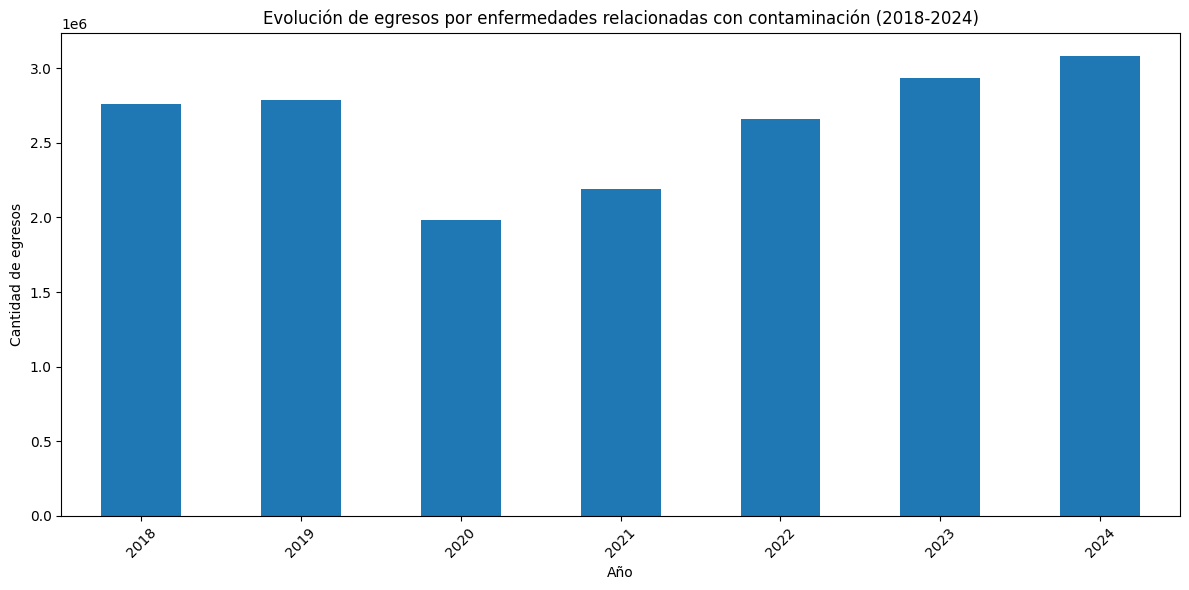

In [10]:
# Análisis exploratorio básico
print(f"Shape del dataset: {df_final.shape}")
print(f"Período: {df_final['AÑO'].min()} - {df_final['AÑO'].max()}")

print("\nDistribución por sexo:")
display(df_final['SEXO'].value_counts())

print("\nDistribución por grupo de edad:")
display(df_final['GRUPO_EDAD'].value_counts().sort_index())

print("\nDistribución por condición de egreso:")
display(df_final['CONDICION_EGRESO'].value_counts())

# Visualización de evolución temporal
plt.figure(figsize=(12, 6))
df_final['AÑO'].value_counts().sort_index().plot(kind='bar')
plt.title('Evolución de egresos por enfermedades relacionadas con contaminación (2018-2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad de egresos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Análisis por región y zona geográfica

Distribución de egresos por región (2018-2024):


,GLOSA_REGION_RESIDENCIA,Cantidad
18,Metropolitana de Santiago,7281707
13,Del Bíobío,1865975
11,De Valparaíso,1854908
6,De La Araucanía,1045276
15,Del Maule,999309
7,De Los Lagos,981617
14,Del Libertador B. O'Higgins,793378
5,De Coquimbo,602114
2,De Antofagasta,552250
12,De Ñuble,494619


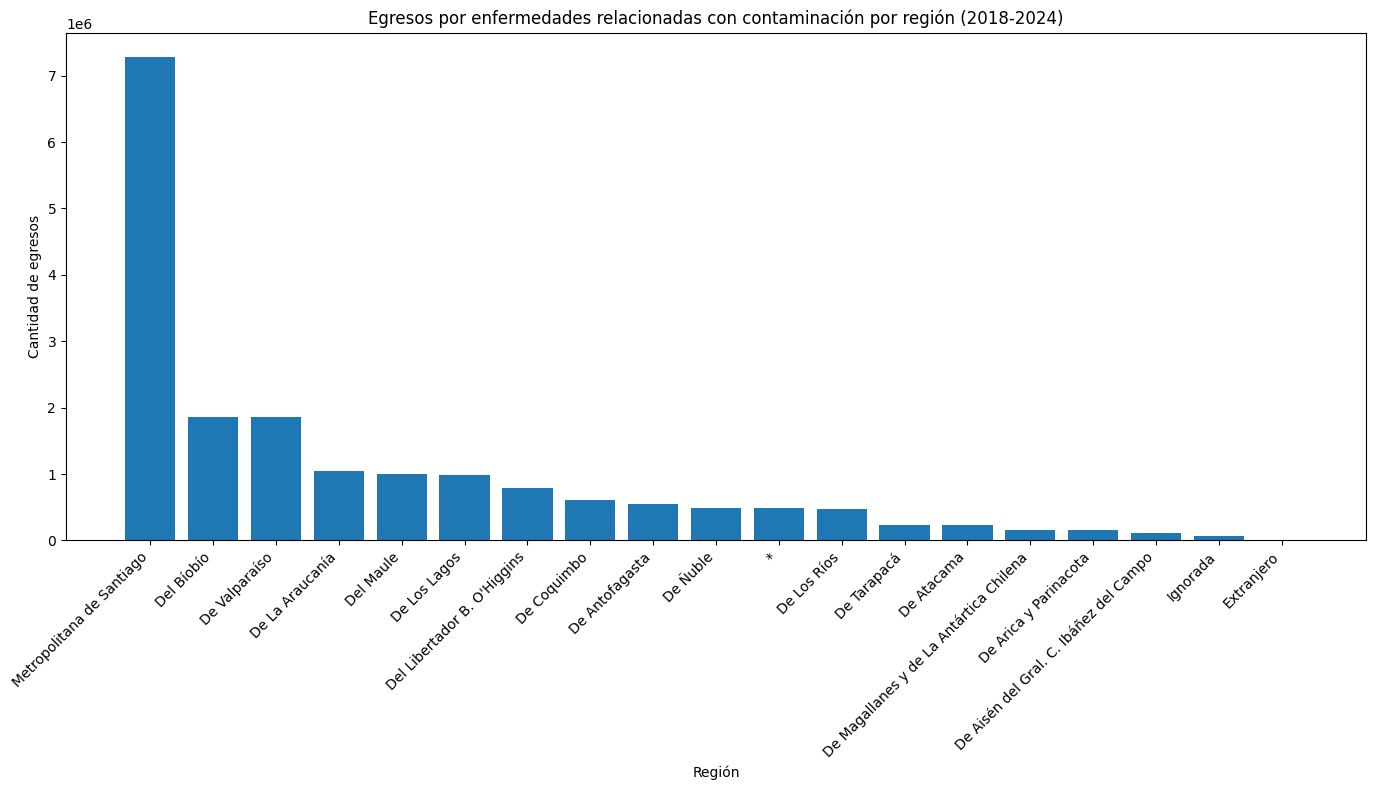


Distribución de egresos por zona geográfica:


,Zona,Cantidad
0,Capital,7281707
1,Centro,6008189
3,Sur,2770226
2,Norte,1780127


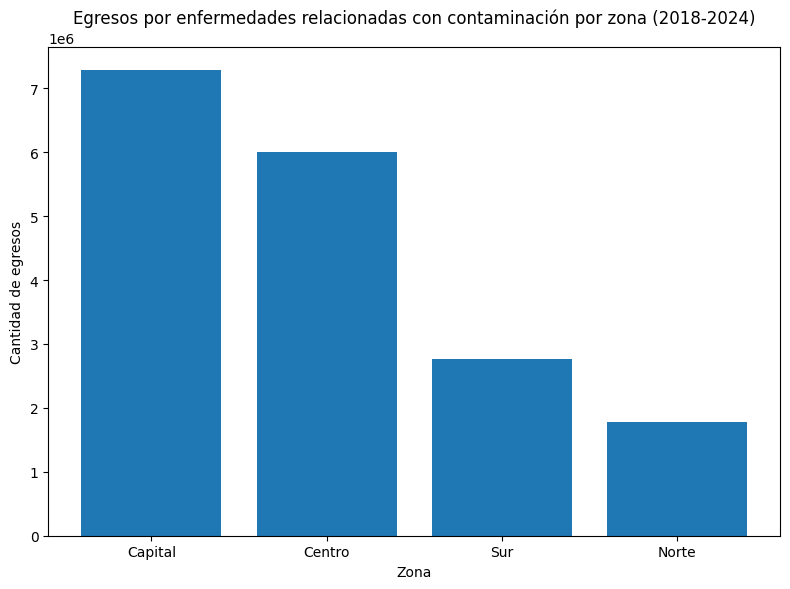

In [11]:
# Análisis por región
egresos_por_region = df_final.groupby('GLOSA_REGION_RESIDENCIA').size().reset_index(name='Cantidad')
egresos_por_region = egresos_por_region.sort_values('Cantidad', ascending=False)

print("Distribución de egresos por región (2018-2024):")
display(egresos_por_region)

# Visualización por región
plt.figure(figsize=(14, 8))
plt.bar(egresos_por_region['GLOSA_REGION_RESIDENCIA'], egresos_por_region['Cantidad'])
plt.xticks(rotation=45, ha='right')
plt.title('Egresos por enfermedades relacionadas con contaminación por región (2018-2024)')
plt.xlabel('Región')
plt.ylabel('Cantidad de egresos')
plt.tight_layout()
plt.show()

# Análisis por zona geográfica
egresos_por_zona = df_final.groupby('Zona').size().reset_index(name='Cantidad')
egresos_por_zona = egresos_por_zona.sort_values('Cantidad', ascending=False)

print("\nDistribución de egresos por zona geográfica:")
display(egresos_por_zona)

# Visualización por zona
plt.figure(figsize=(8, 6))
plt.bar(egresos_por_zona['Zona'], egresos_por_zona['Cantidad'])
plt.title('Egresos por enfermedades relacionadas con contaminación por zona (2018-2024)')
plt.xlabel('Zona')
plt.ylabel('Cantidad de egresos')
plt.tight_layout()
plt.show()

### Top 10 de grupos de diagnósticos a nivel nacional

Top 10 de grupos de diagnósticos a nivel nacional (2018-2024):


,GLOSA GRUPO,Cantidad
14,Influenza [gripe] y neumonía,2035991
5,Enfermedades cerebrovasculares,1697496
22,Otras formas de enfermedad del corazón,1372046
2,Diabetes mellitus,1341740
11,Enfermedades isquémicas del corazón,1241198
40,Tumores malignos de los órganos digestivos,1147723
19,Otras enfermedades de las vías respiratorias s...,1033721
30,Tumores [neoplasias] benignos,886449
34,Tumores [neoplasias] malignos del tejido linfá...,738781
23,Otras infecciones agudas de las vías respirato...,676473


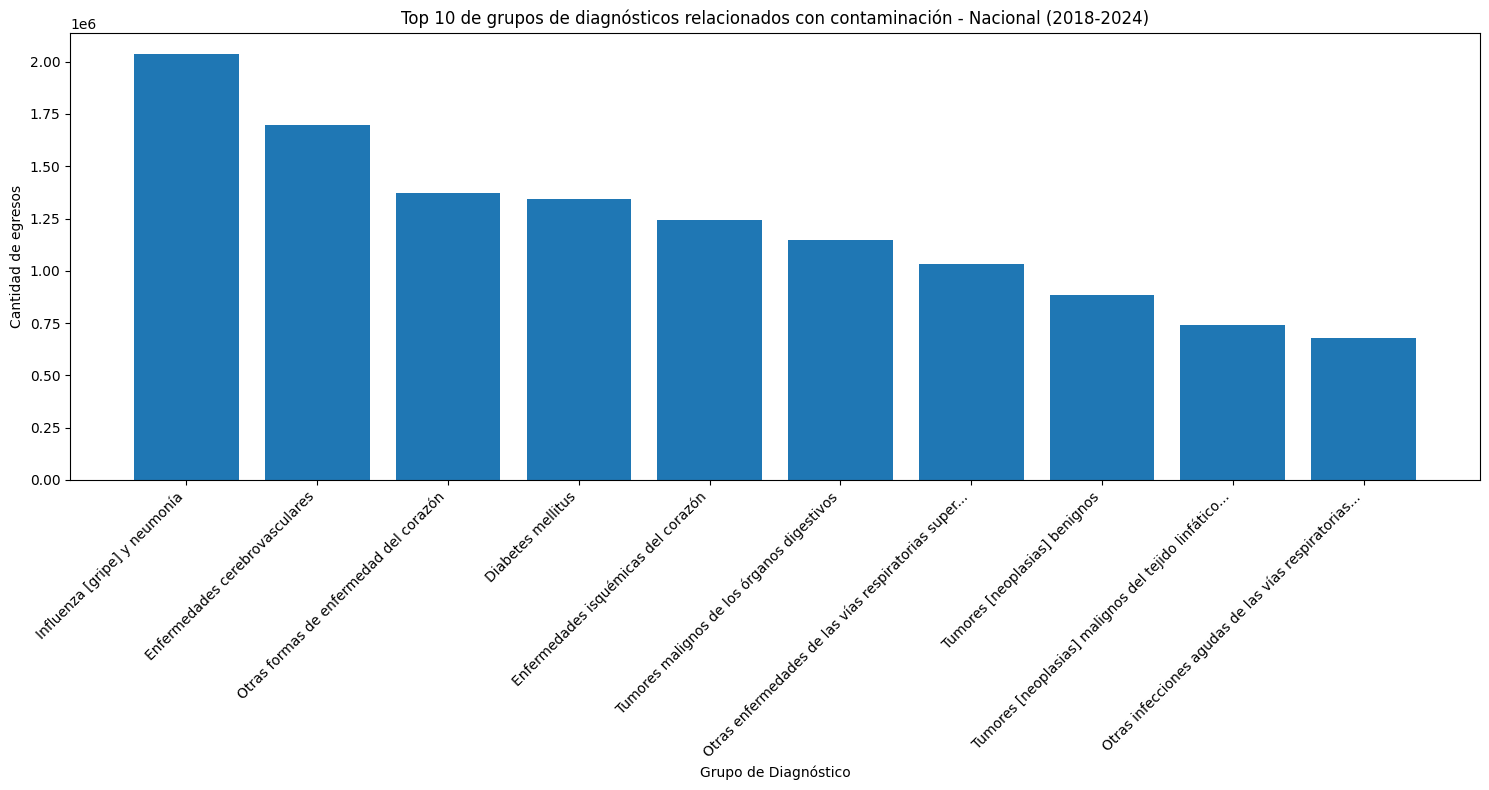

In [12]:
# Top 10 de grupos de diagnósticos a nivel nacional
top_grupos_nacional = df_final.groupby('GLOSA GRUPO ').size().reset_index(name='Cantidad')
top_grupos_nacional = top_grupos_nacional.sort_values('Cantidad', ascending=False).head(10)

print("Top 10 de grupos de diagnósticos a nivel nacional (2018-2024):")
display(top_grupos_nacional)

# Visualización
plt.figure(figsize=(15, 8))
plt.bar(range(len(top_grupos_nacional)), top_grupos_nacional['Cantidad'])
plt.xticks(range(len(top_grupos_nacional)), 
           [desc[:50] + '...' if len(desc) > 50 else desc 
            for desc in top_grupos_nacional['GLOSA GRUPO ']], 
           rotation=45, ha='right')
plt.title('Top 10 de grupos de diagnósticos relacionados con contaminación - Nacional (2018-2024)')
plt.xlabel('Grupo de Diagnóstico')
plt.ylabel('Cantidad de egresos')
plt.tight_layout()
plt.show()

### Análisis temporal y evolutivo

Evolución de egresos por zona y año:


Zona,Capital,Centro,Norte,Sur
AÑO,,,,
2018,1077855,915689,245986,440786
2019,1106215,927772,251598,437777
2020,788152,652102,195595,300406
2021,904183,701166,238155,333150
2022,1094692,871501,246946,388113
2023,1095048,898140,281835,410460
2024,1215562,1041819,320012,459534


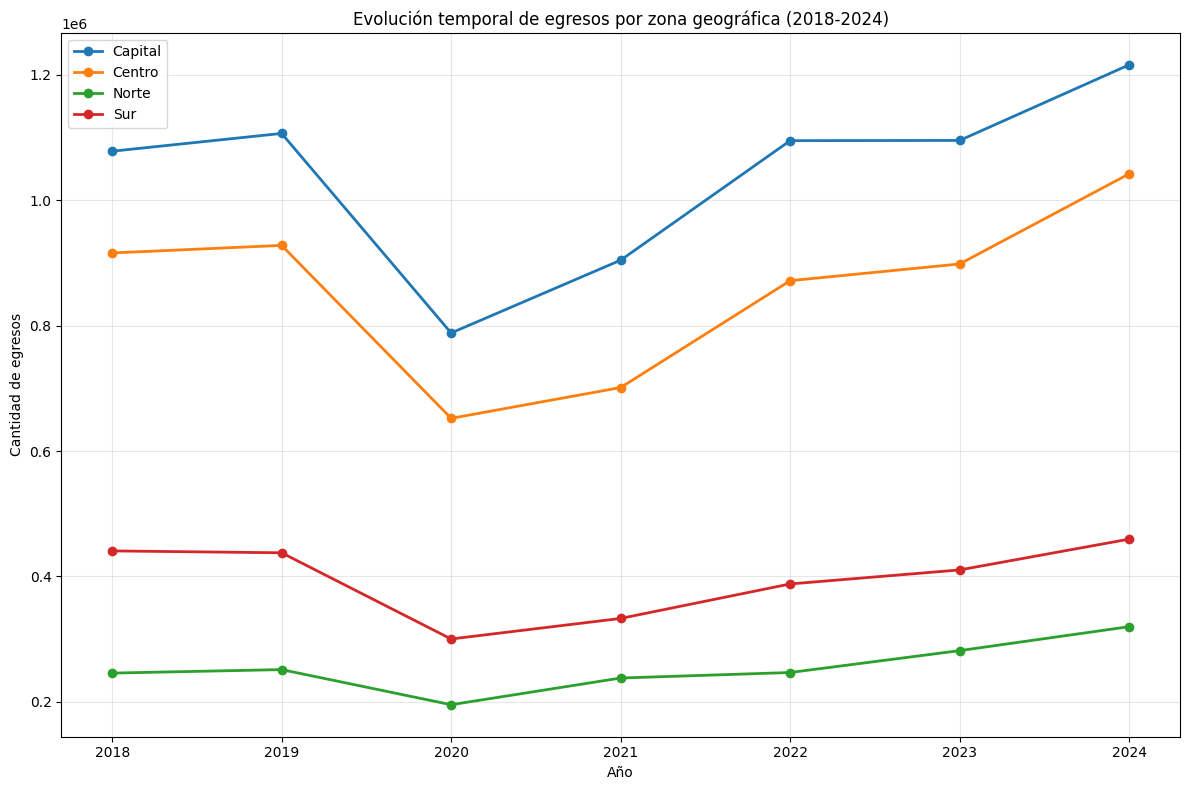

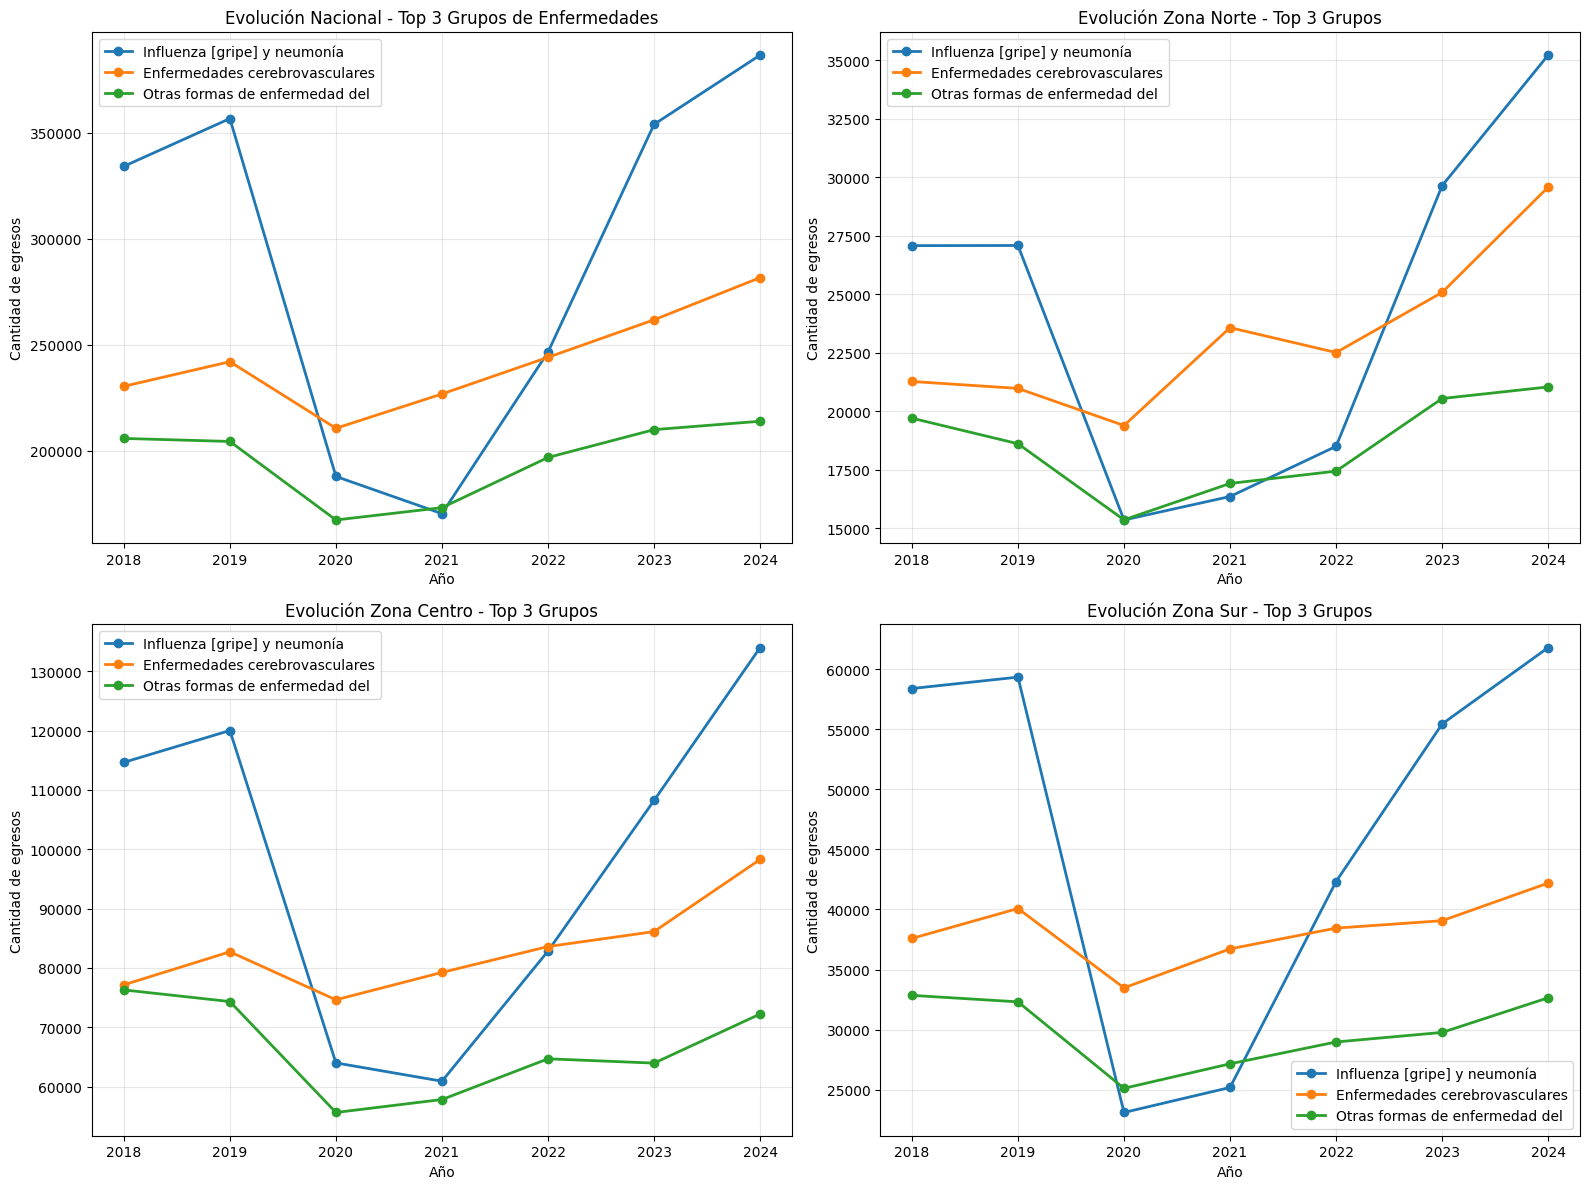

In [13]:
# Análisis evolutivo por año y zona
evolucion_zona = df_final.groupby(['AÑO', 'Zona']).size().reset_index(name='Cantidad')
evolucion_zona_pivot = evolucion_zona.pivot(index='AÑO', columns='Zona', values='Cantidad')

print("Evolución de egresos por zona y año:")
display(evolucion_zona_pivot)

# Visualización de evolución temporal por zona
plt.figure(figsize=(12, 8))
for zona in evolucion_zona_pivot.columns:
    plt.plot(evolucion_zona_pivot.index, evolucion_zona_pivot[zona], marker='o', label=zona, linewidth=2)

plt.title('Evolución temporal de egresos por zona geográfica (2018-2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad de egresos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis por capítulo de enfermedad - Panel de visualizaciones
evolucion_grupo = df_final.groupby(['AÑO', 'GLOSA GRUPO ']).size().reset_index(name='Cantidad')

# Top 3 capítulos por volumen
top_grupos = df_final['GLOSA GRUPO '].value_counts().head(3).index

# Crear panel de 2x2 con gráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Evolución nacional por capítulo
for grupo in top_grupos:
    data_grupo = evolucion_grupo[evolucion_grupo['GLOSA GRUPO '] == grupo]
    ax1.plot(data_grupo['AÑO'], data_grupo['Cantidad'], marker='o', label=grupo[:30], linewidth=2)

ax1.set_title('Evolución Nacional - Top 3 Grupos de Enfermedades')
ax1.set_xlabel('Año')
ax1.set_ylabel('Cantidad de egresos')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Evolución por zona - Norte
evolucion_zona_grupo = df_final.groupby(['AÑO', 'Zona', 'GLOSA GRUPO ']).size().reset_index(name='Cantidad')
zona_norte = evolucion_zona_grupo[evolucion_zona_grupo['Zona'] == 'Norte']

for grupo in top_grupos:
    data_grupo = zona_norte[zona_norte['GLOSA GRUPO '] == grupo]
    if not data_grupo.empty:
        ax2.plot(data_grupo['AÑO'], data_grupo['Cantidad'], marker='o', label=grupo[:30], linewidth=2)

ax2.set_title('Evolución Zona Norte - Top 3 Grupos')
ax2.set_xlabel('Año')
ax2.set_ylabel('Cantidad de egresos')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Evolución por zona - Centro
zona_centro = evolucion_zona_grupo[evolucion_zona_grupo['Zona'] == 'Centro']

for grupo in top_grupos:
    data_grupo = zona_centro[zona_centro['GLOSA GRUPO '] == grupo]
    if not data_grupo.empty:
        ax3.plot(data_grupo['AÑO'], data_grupo['Cantidad'], marker='o', label=grupo[:30], linewidth=2)

ax3.set_title('Evolución Zona Centro - Top 3 Grupos')
ax3.set_xlabel('Año')
ax3.set_ylabel('Cantidad de egresos')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Evolución por zona - Sur
zona_sur = evolucion_zona_grupo[evolucion_zona_grupo['Zona'] == 'Sur']

for grupo in top_grupos:
    data_grupo = zona_sur[zona_sur['GLOSA GRUPO '] == grupo]
    if not data_grupo.empty:
        ax4.plot(data_grupo['AÑO'], data_grupo['Cantidad'], marker='o', label=grupo[:30], linewidth=2)

ax4.set_title('Evolución Zona Sur - Top 3 Grupos')
ax4.set_xlabel('Año')
ax4.set_ylabel('Cantidad de egresos')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Promedios de Contaminación PM2.5 por Zona y Año (2018 en adelante):


C:\Users\carlo\AppData\Local\Temp\ipykernel_15440\35165846.py:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp['PM25'] = df_temp['Registros validados'].fillna(df_temp['Registros preliminares']).fillna(df_temp['Registros no validados'])
C:\Users\carlo\AppData\Local\Temp\ipykernel_15440\35165846.py:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp['PM25'] = df_temp['Registros validados'].fillna(df_temp['Registros preliminares']).fillna(df_temp['Registros no validados'])
C:\Users\carlo\AppData\Local\Temp\ipykernel_15440\35165846.py:43: Futu

,Zona,Año,PM25
0,Capital,2018,23.020600
8,Centro,2018,22.663733
16,Norte,2018,11.663902
24,Sur,2018,29.475883
1,Capital,2019,22.638280
9,Centro,2019,21.122567
17,Norte,2019,10.365724
25,Sur,2019,18.375705
2,Capital,2020,20.334025
10,Centro,2020,20.054967


<Figure size 1500x800 with 0 Axes>

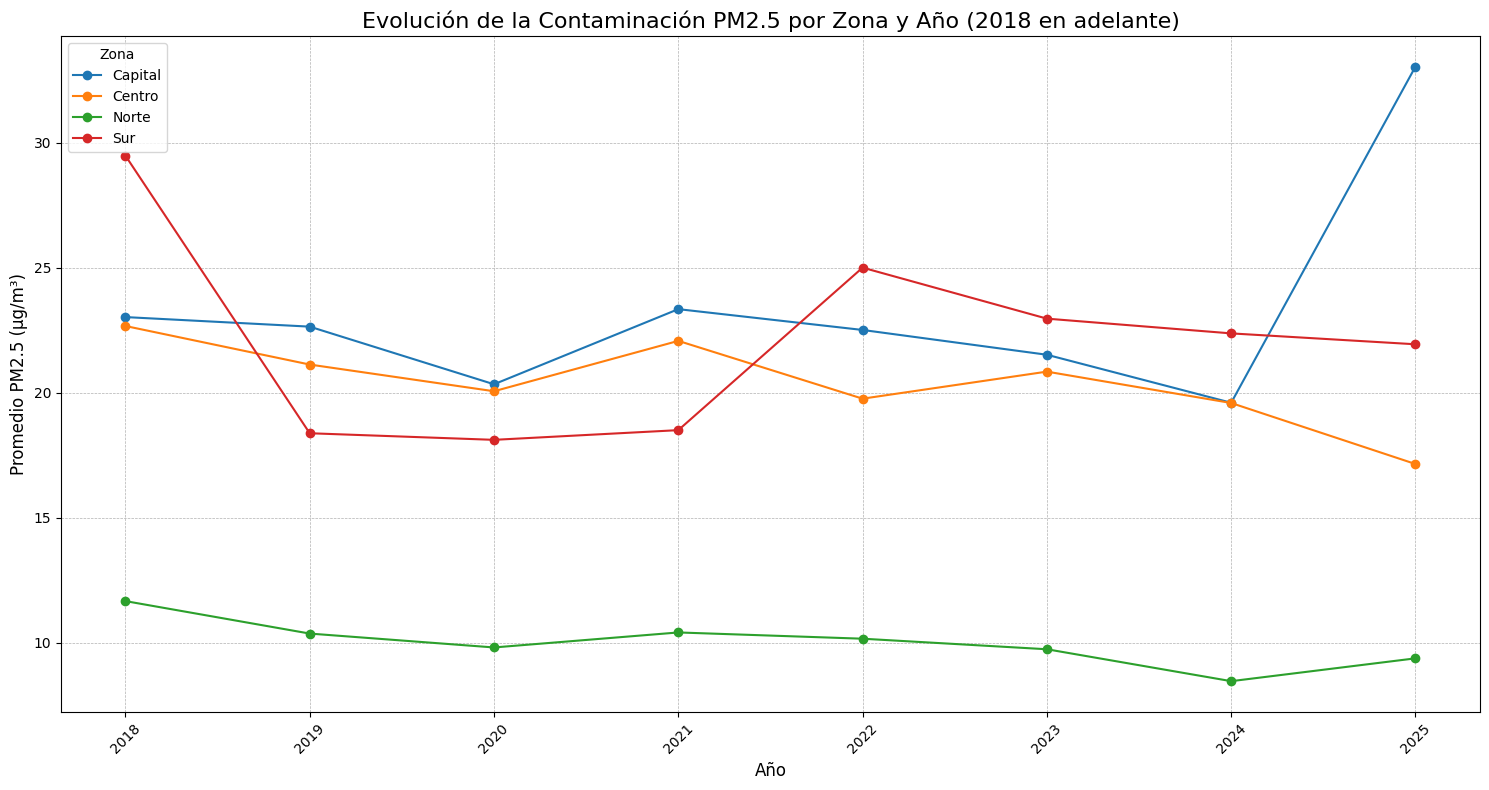

In [14]:
# Cargar y procesar datos de contaminación PM2.5 por zona y año

import glob

# Definir las zonas y la ruta base
zonas_contaminacion = ['Norte', 'Centro', 'Sur', 'Capital']
ruta_base_contaminacion = 'Contaminacion'

# Lista para almacenar los dataframes procesados
dfs_contaminacion = []

# Función para convertir valores con comas a números
def convertir_a_numero(valor):
    if pd.isna(valor):
        return None
    if isinstance(valor, str):
        # Reemplazar coma por punto y convertir a float
        return float(valor.replace(',', '.'))
    return float(valor)

for zona in zonas_contaminacion:
    ruta_zona = os.path.join(ruta_base_contaminacion, zona)
    archivos_csv = glob.glob(os.path.join(ruta_zona, '*.csv'))
    
    for archivo in archivos_csv:
        try:
            df_temp = pd.read_csv(archivo, encoding='latin-1', sep=';')
            
            # Procesar solo si el dataframe no está vacío
            if not df_temp.empty:
                # 1. Filtrar por fechas que tengan 6 dígitos
                df_temp = df_temp[df_temp['FECHA (YYMMDD)'].astype(str).str.len() == 6].copy()

                df_temp['Zona'] = zona
                
                # 2. Convertir las tres columnas de registros a numérico
                pm25_cols = ["Registros validados", "Registros preliminares", "Registros no validados"]
                for col in pm25_cols:
                    if col in df_temp.columns:
                        df_temp[col] = df_temp[col].apply(convertir_a_numero)
                
                # Consolidar en una única columna PM25
                df_temp['PM25'] = df_temp['Registros validados'].fillna(df_temp['Registros preliminares']).fillna(df_temp['Registros no validados'])
                
                # Eliminar filas donde PM2.5 es nulo después de consolidar
                df_temp.dropna(subset=['PM25'], inplace=True)
                
                if not df_temp.empty:
                    # Convertir fecha a string para manipulación segura
                    df_temp['Fecha_str'] = df_temp['FECHA (YYMMDD)'].astype(str)
                    # Extraer año
                    df_temp['Año'] = '20' + df_temp['Fecha_str'].str[:2]
                    
                    dfs_contaminacion.append(df_temp)
        except Exception as e:
            print(f"Error procesando {archivo}: {e}")

# Concatenar todos los dataframes en uno solo
if dfs_contaminacion:
    df_total_contaminacion = pd.concat(dfs_contaminacion, ignore_index=True)
    
    # 1. Filtrar desde 2018 en adelante
    df_total_contaminacion['Año'] = df_total_contaminacion['Año'].astype(int)
    df_contaminacion_filtrado = df_total_contaminacion[df_total_contaminacion['Año'] >= 2018].copy()


    # Calcular el promedio por zona y año
    promedios_anuales = df_contaminacion_filtrado.groupby(['Zona', 'Año'])['PM25'].mean().reset_index()
    
    # Ordenar los resultados para una mejor visualización
    promedios_anuales_sorted = promedios_anuales.sort_values(by=['Año', 'Zona'])

    print("Promedios de Contaminación PM2.5 por Zona y Año (2018 en adelante):")
    display(promedios_anuales_sorted)

    # Visualizar la evolución de la contaminación
    plt.figure(figsize=(15, 8))
    
    # Pivotear la tabla para graficar fácilmente
    pivot_promedios = promedios_anuales_sorted.pivot(index='Año', columns='Zona', values='PM25')
    
    pivot_promedios.plot(kind='line', marker='o', figsize=(15, 8))
    
    plt.title('Evolución de la Contaminación PM2.5 por Zona y Año (2018 en adelante)', fontsize=16)
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Promedio PM2.5 (μg/m³)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(title='Zona')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron o no se pudieron procesar los archivos de contaminación.")

Top 5 de grupos de diagnósticos por zona (2018-2024):


C:\Users\carlo\AppData\Local\Temp\ipykernel_15440\2647847820.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_diagnosticos_zona = top_5_diagnosticos_zona.groupby('Zona').apply(lambda x: x.nlargest(5, 'Cantidad')).reset_index(drop=True)


,Zona,GLOSA GRUPO,Cantidad
0,Capital,Influenza [gripe] y neumonía,795868
1,Capital,Enfermedades cerebrovasculares,640123
2,Capital,Otras formas de enfermedad del corazón,530830
3,Capital,Enfermedades isquémicas del corazón,461675
4,Capital,Diabetes mellitus,452360
5,Centro,Influenza [gripe] y neumonía,684603
6,Centro,Enfermedades cerebrovasculares,581745
7,Centro,Diabetes mellitus,472360
8,Centro,Otras formas de enfermedad del corazón,464975
9,Centro,Enfermedades isquémicas del corazón,390093


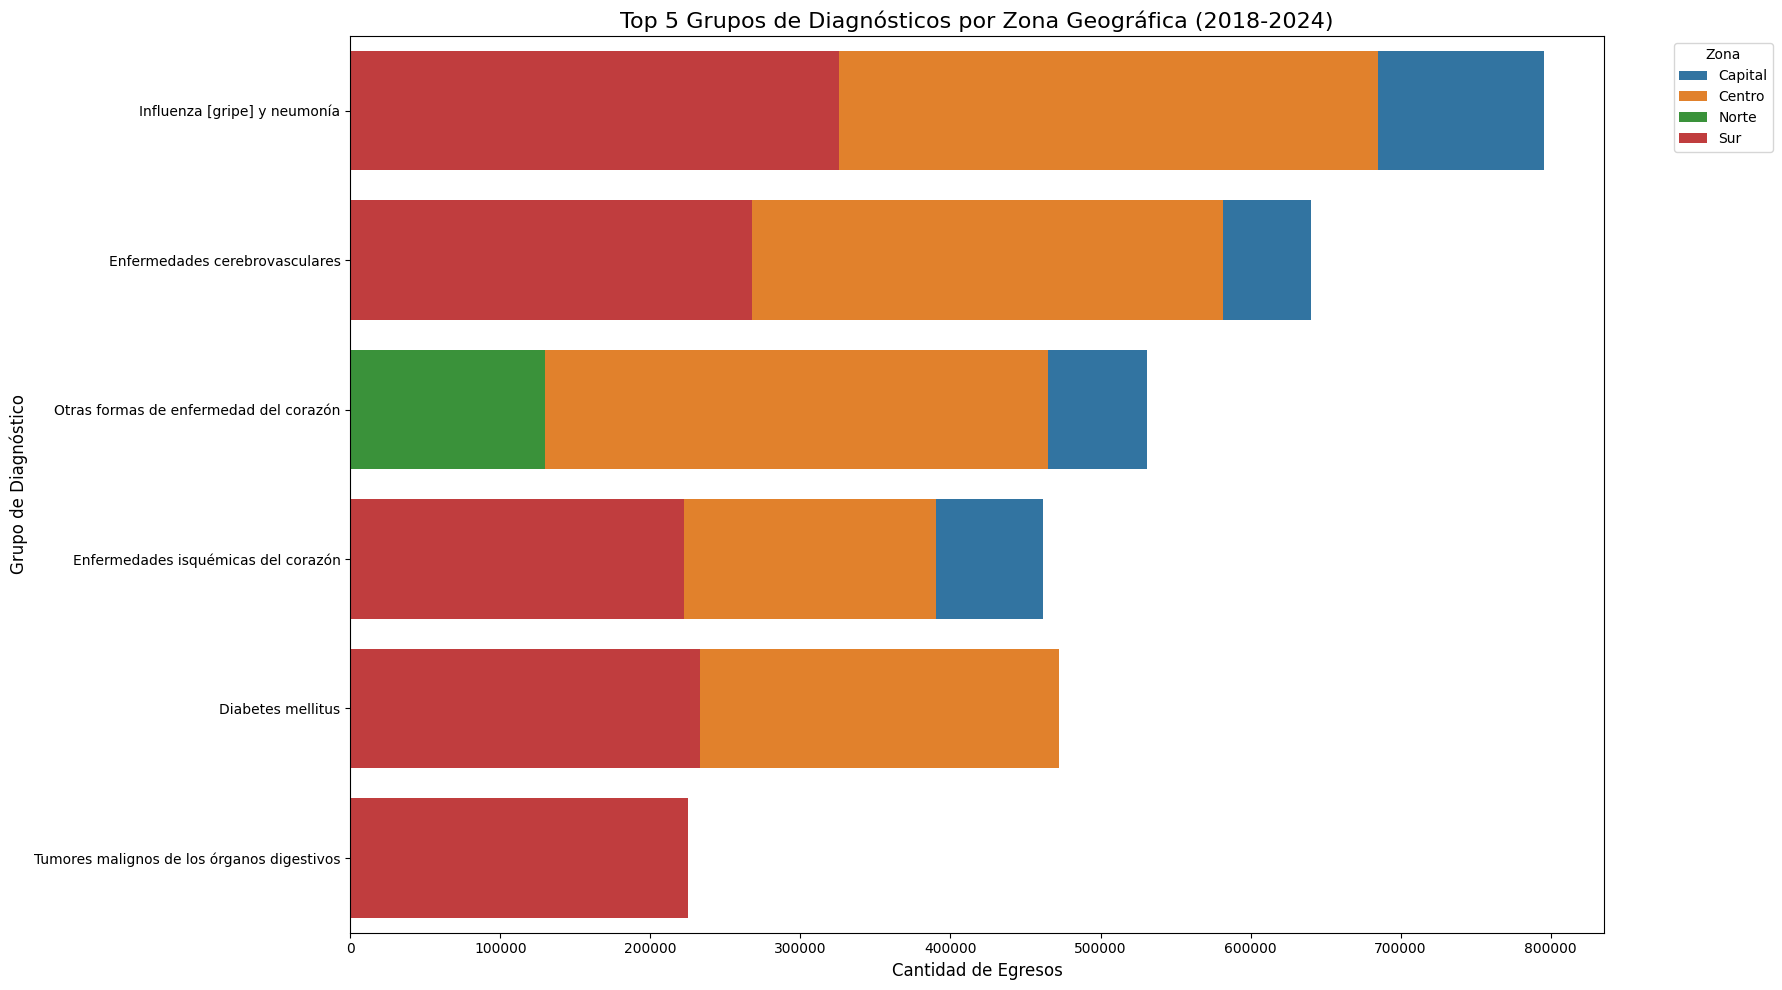


Datos combinados de Contaminación PM2.5 y Egresos Hospitalarios:


,Zona,Año,PM25,Egresos
0,Capital,2018,23.020600,1077855
1,Centro,2018,22.663733,915689
2,Norte,2018,11.663902,245986
3,Sur,2018,29.475883,440786
4,Capital,2019,22.638280,1106215
5,Centro,2019,21.122567,927772
6,Norte,2019,10.365724,251598
7,Sur,2019,18.375705,437777
8,Capital,2020,20.334025,788152
9,Centro,2020,20.054967,652102



Análisis de Correlación por Zona:
  - Correlación en la zona Capital: -0.0833
  - Correlación en la zona Centro: -0.1584
  - Correlación en la zona Norte: -0.5402
  - Correlación en la zona Sur: 0.5261


C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


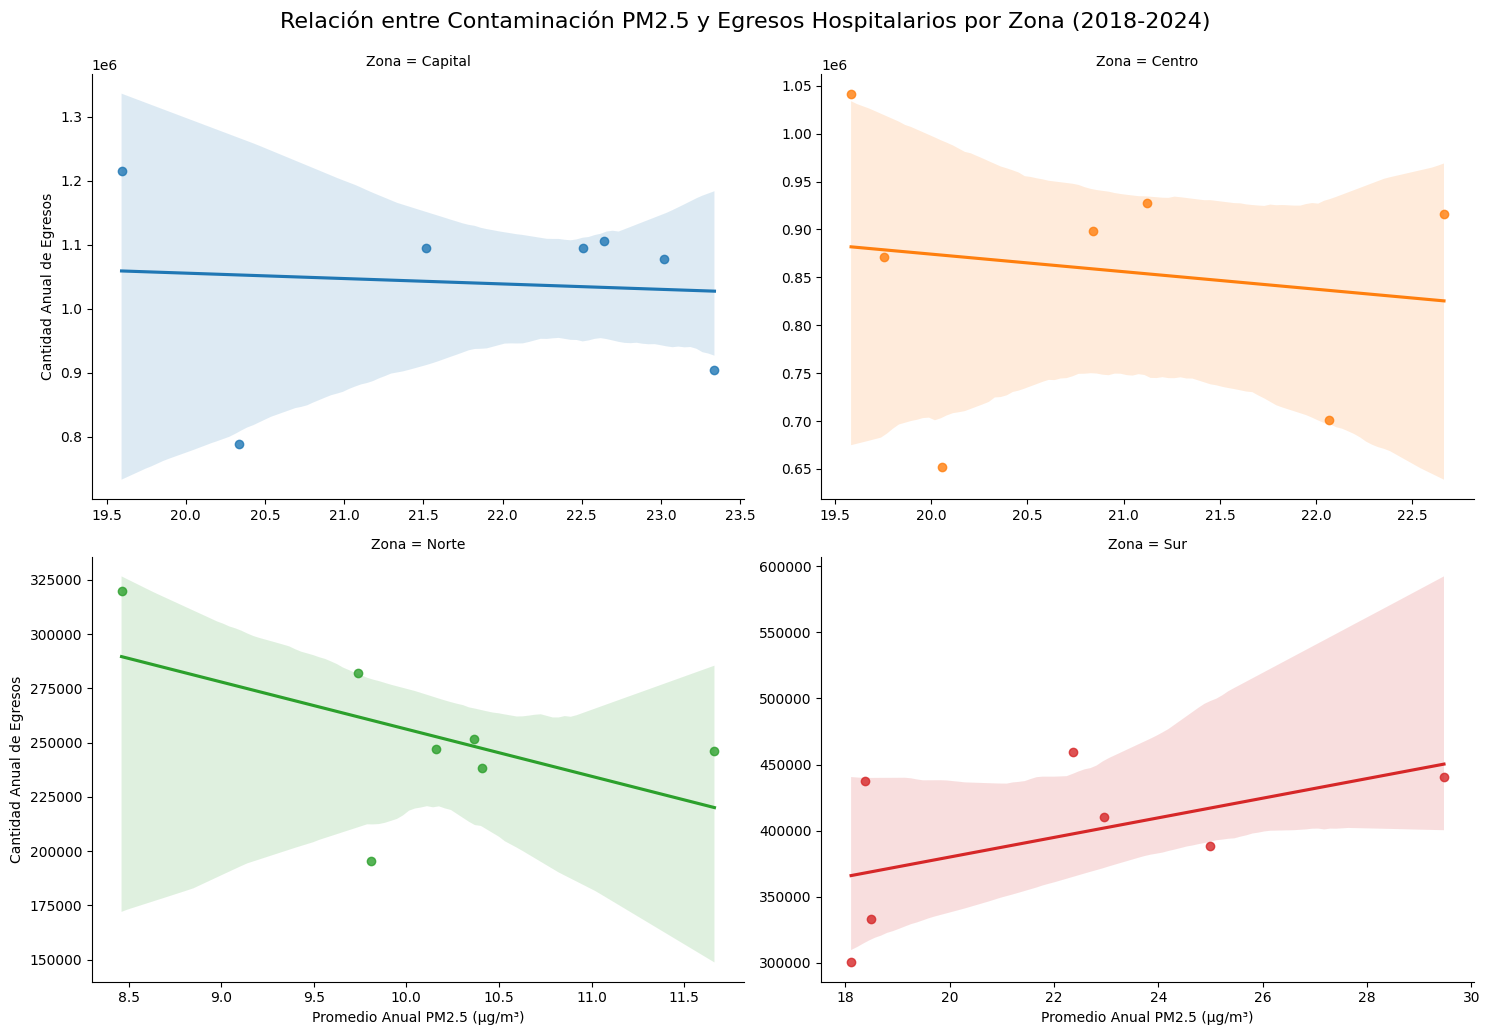

In [16]:
# 3. Análisis de Diagnósticos por Zona y Relación con Contaminación

# a) Top 5 de grupos de diagnósticos por zona
top_5_diagnosticos_zona = df_final.groupby(['Zona', 'GLOSA GRUPO ']).size().reset_index(name='Cantidad')
top_5_diagnosticos_zona = top_5_diagnosticos_zona.groupby('Zona').apply(lambda x: x.nlargest(5, 'Cantidad')).reset_index(drop=True)

print("Top 5 de grupos de diagnósticos por zona (2018-2024):")
display(top_5_diagnosticos_zona)

# Visualización del top 5 por zona
plt.figure(figsize=(18, 10))
sns.barplot(data=top_5_diagnosticos_zona, x='Cantidad', y='GLOSA GRUPO ', hue='Zona', dodge=False)
plt.title('Top 5 Grupos de Diagnósticos por Zona Geográfica (2018-2024)', fontsize=16)
plt.xlabel('Cantidad de Egresos', fontsize=12)
plt.ylabel('Grupo de Diagnóstico', fontsize=12)
plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# b) Preparar datos para la unión
# Calcular egresos anuales por zona
egresos_anuales_zona = df_final.groupby(['Zona', 'AÑO']).size().reset_index(name='Egresos')
egresos_anuales_zona.rename(columns={'AÑO': 'Año'}, inplace=True)

# Unir datos de egresos y contaminación
df_combinado = pd.merge(promedios_anuales_sorted, egresos_anuales_zona, on=['Zona', 'Año'], how='inner')

print("\nDatos combinados de Contaminación PM2.5 y Egresos Hospitalarios:")
display(df_combinado)

# c) Análisis de correlación
print("\nAnálisis de Correlación por Zona:")
for zona in df_combinado['Zona'].unique():
    df_zona_corr = df_combinado[df_combinado['Zona'] == zona]
    
    if len(df_zona_corr) > 1:
        correlacion = df_zona_corr['PM25'].corr(df_zona_corr['Egresos'])
        print(f"  - Correlación en la zona {zona}: {correlacion:.4f}")
    else:
        print(f"  - No hay suficientes datos para calcular la correlación en la zona {zona}.")

# d) Visualización de la relación
g = sns.lmplot(data=df_combinado, x='PM25', y='Egresos', hue='Zona', col='Zona', col_wrap=2, height=5, aspect=1.5, sharex=False, sharey=False)
g.fig.suptitle('Relación entre Contaminación PM2.5 y Egresos Hospitalarios por Zona (2018-2024)', y=1.03, fontsize=16)
g.set_axis_labels('Promedio Anual PM2.5 (μg/m³)', 'Cantidad Anual de Egresos')
plt.show()

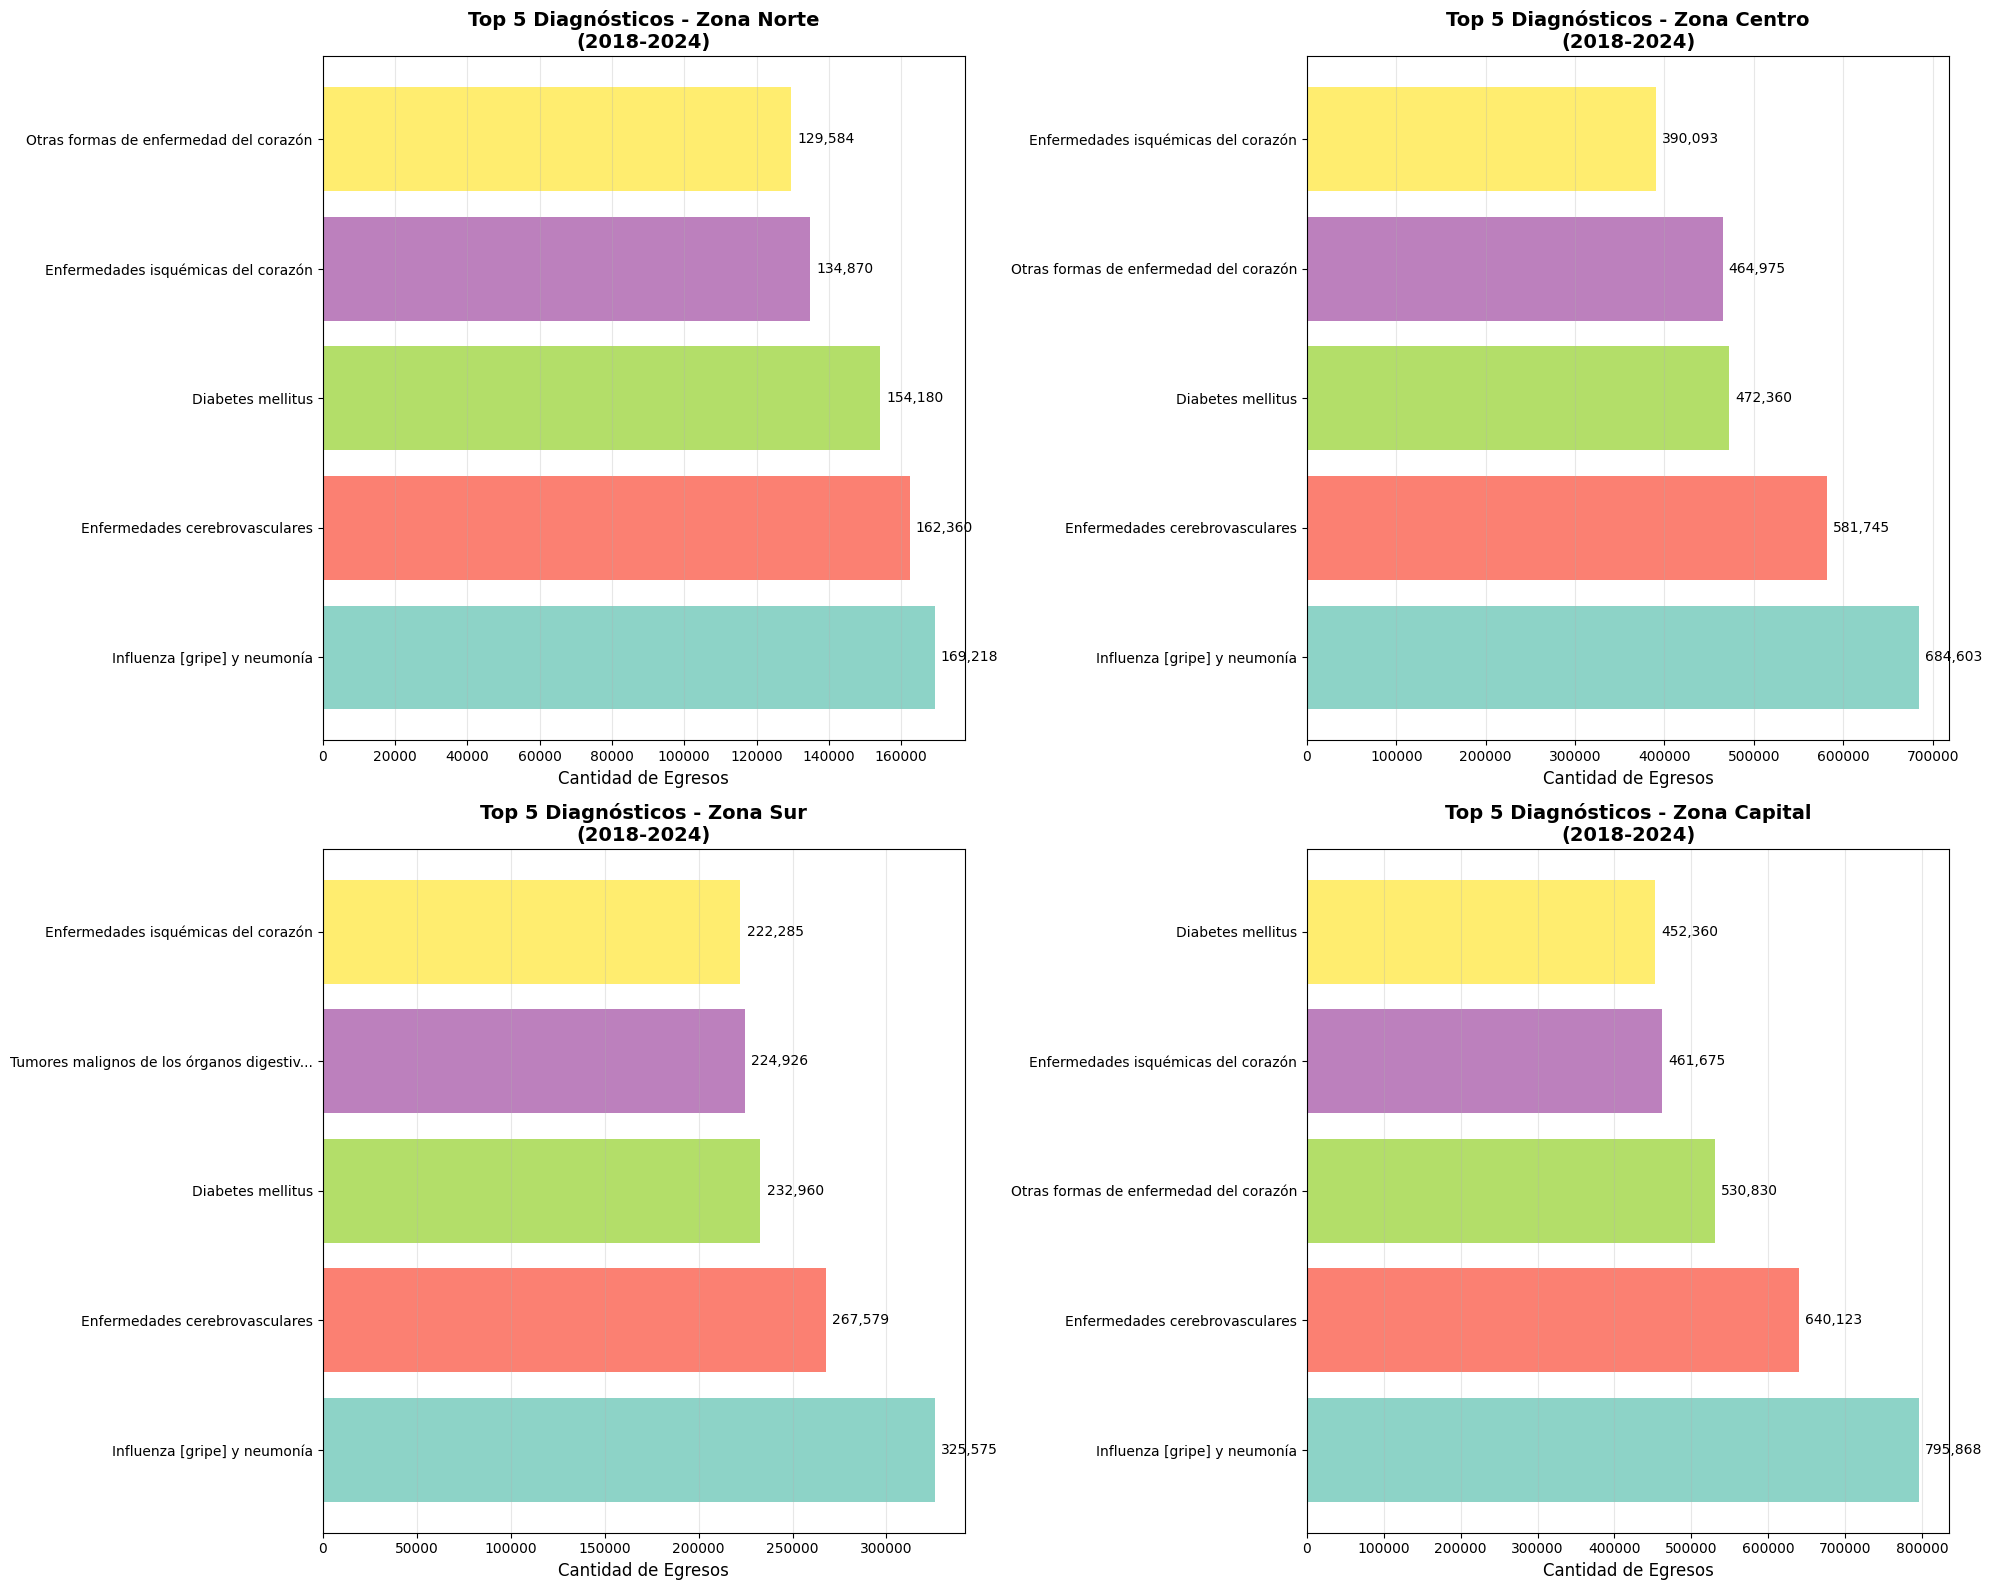

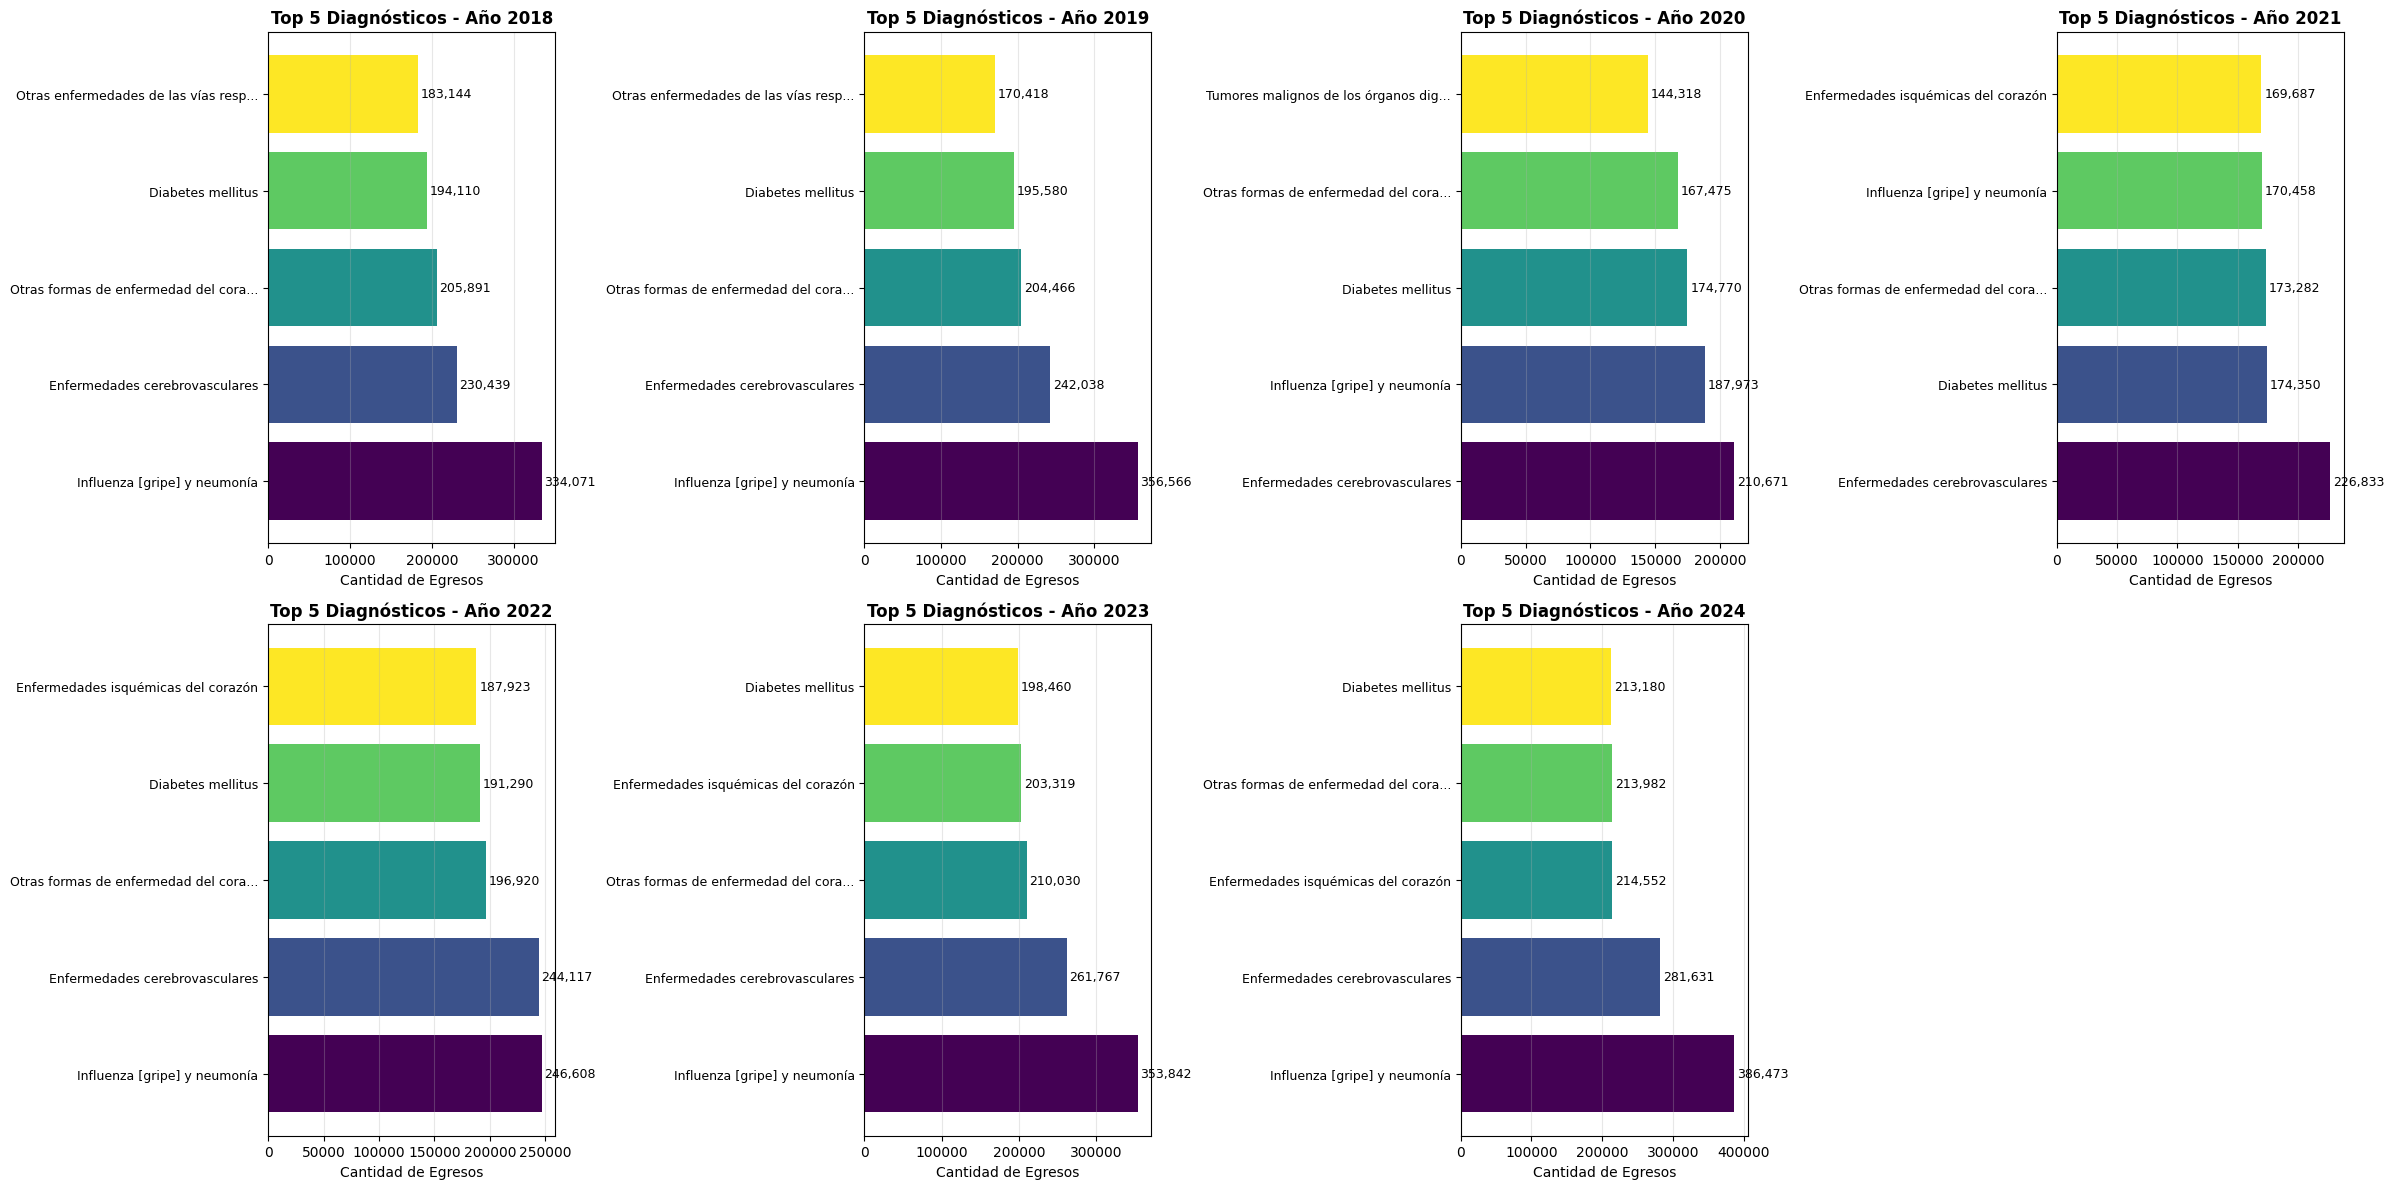

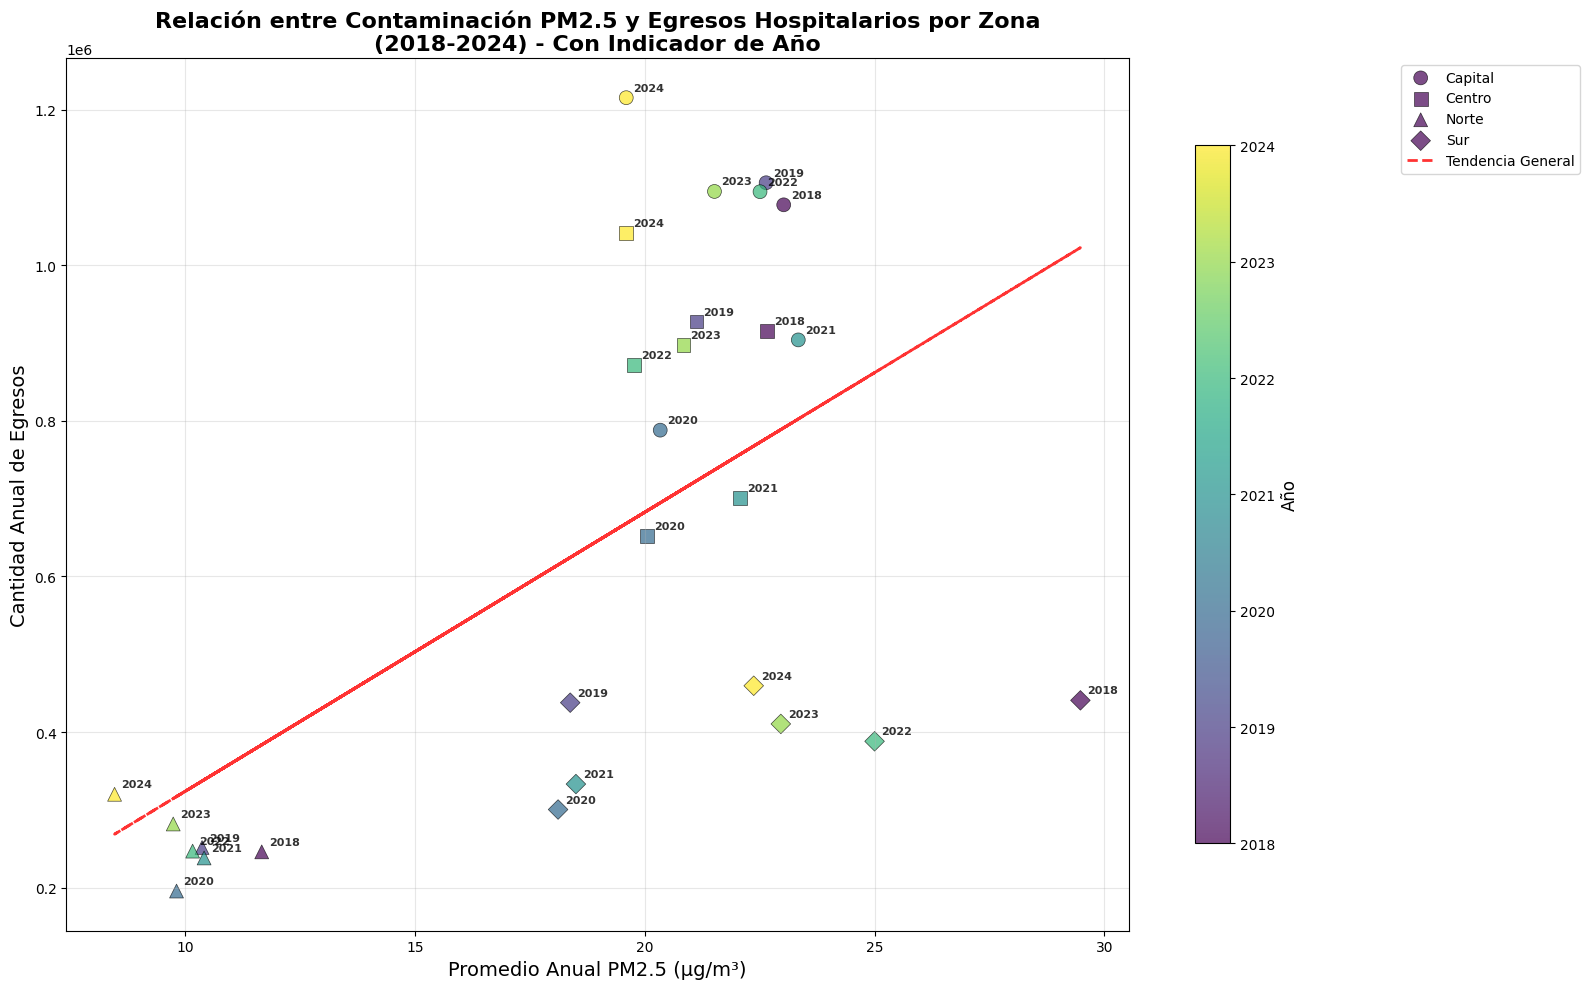

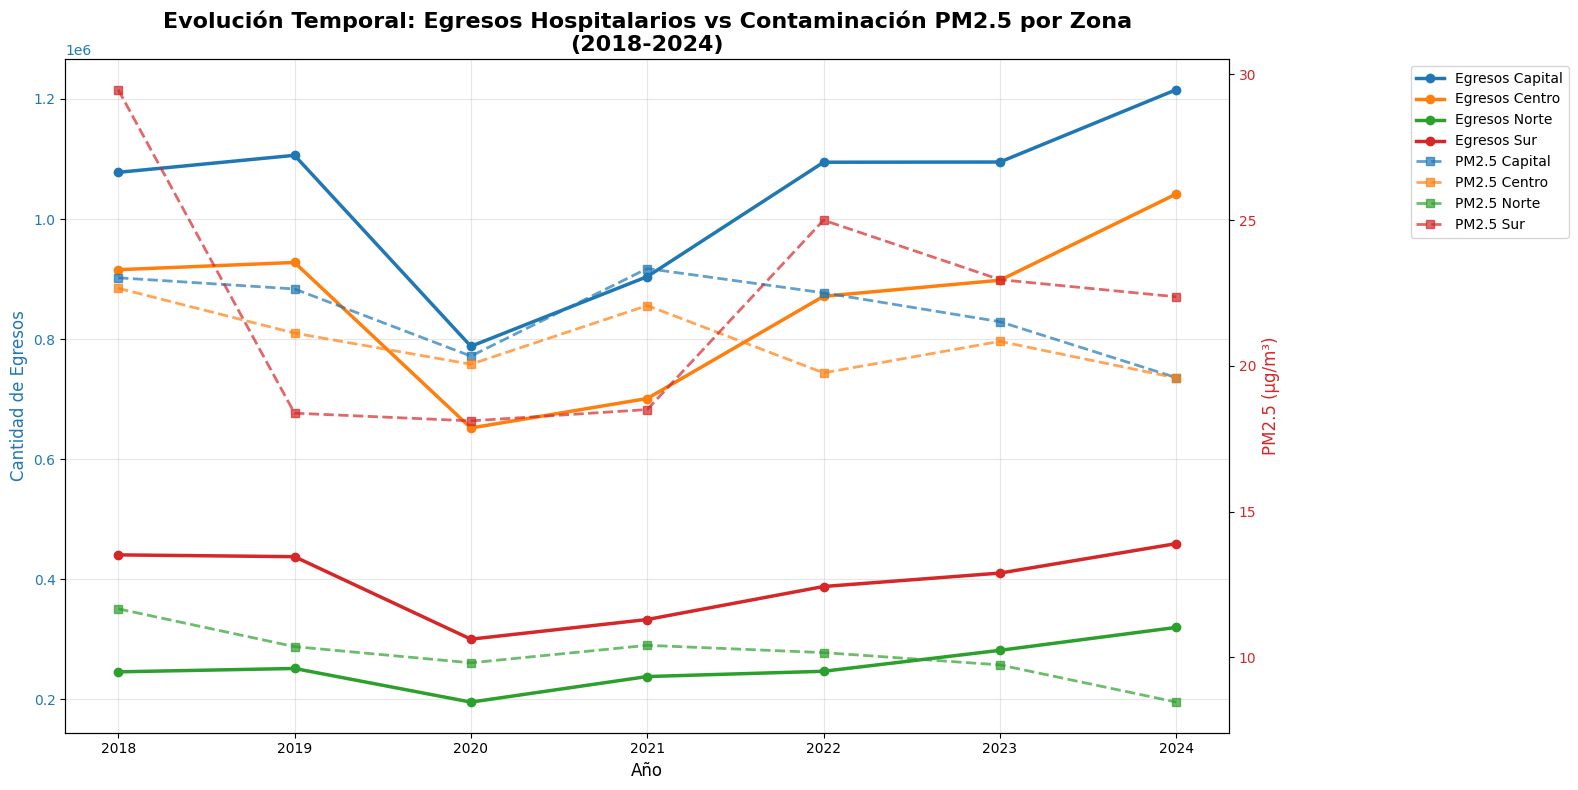

In [24]:
# 4. Gráficos Adicionales de Análisis

# =============================================================================
# a) Top 5 de diagnósticos por zona (todos los años 2018-2024)
# =============================================================================

# Crear una figura con subplots para cada zona
zonas_unicas = df_final['Zona'].dropna().unique()  # Eliminar valores NaN
n_zonas = len(zonas_unicas)

# Configurar el layout de subplots dinámicamente
if n_zonas <= 4:
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
elif n_zonas <= 6:
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    axes = axes.flatten()
else:
    fig, axes = plt.subplots(3, 3, figsize=(27, 20))
    axes = axes.flatten()

for i, zona in enumerate(zonas_unicas):
    # Filtrar datos por zona (excluir NaN)
    df_zona = df_final[df_final['Zona'] == zona]
    
    # Calcular top 5 diagnósticos para esta zona
    top_5_zona = df_zona.groupby('GLOSA GRUPO ').size().reset_index(name='Cantidad')
    top_5_zona = top_5_zona.sort_values('Cantidad', ascending=False).head(5)
    
    # Crear gráfico de barras
    bars = axes[i].barh(range(len(top_5_zona)), top_5_zona['Cantidad'], 
                        color=plt.cm.Set3(np.linspace(0, 1, len(top_5_zona))))
    
    # Configurar etiquetas y título
    axes[i].set_yticks(range(len(top_5_zona)))
    axes[i].set_yticklabels([label[:40] + '...' if len(label) > 40 else label 
                            for label in top_5_zona['GLOSA GRUPO ']], fontsize=10)
    axes[i].set_xlabel('Cantidad de Egresos', fontsize=12)
    axes[i].set_title(f'Top 5 Diagnósticos - Zona {zona}\n(2018-2024)', fontsize=14, fontweight='bold')
    axes[i].grid(axis='x', alpha=0.3)
    
    # Agregar valores en las barras
    for j, (bar, valor) in enumerate(zip(bars, top_5_zona['Cantidad'])):
        axes[i].text(bar.get_width() + max(top_5_zona['Cantidad']) * 0.01, 
                    bar.get_y() + bar.get_height()/2, 
                    f'{valor:,}', ha='left', va='center', fontsize=10)

# Ocultar subplots no utilizados
for j in range(n_zonas, len(axes)):
    axes[j].set_visible(False)

# Ajustar layout
plt.tight_layout()
plt.show()

# =============================================================================
# b) Top 5 diagnósticos a nivel nacional por año (2018-2024)
# =============================================================================

# Calcular top 5 por año
años = sorted(df_final['AÑO'].unique())
n_años = len(años)

# Crear figura con subplots para cada año
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()

for i, año in enumerate(años):
    # Filtrar datos por año
    df_año = df_final[df_final['AÑO'] == año]
    
    # Calcular top 5 diagnósticos para este año
    top_5_año = df_año.groupby('GLOSA GRUPO ').size().reset_index(name='Cantidad')
    top_5_año = top_5_año.sort_values('Cantidad', ascending=False).head(5)
    
    # Crear gráfico de barras
    bars = axes[i].barh(range(len(top_5_año)), top_5_año['Cantidad'], 
                        color=plt.cm.viridis(np.linspace(0, 1, len(top_5_año))))
    
    # Configurar etiquetas y título
    axes[i].set_yticks(range(len(top_5_año)))
    axes[i].set_yticklabels([label[:35] + '...' if len(label) > 35 else label 
                            for label in top_5_año['GLOSA GRUPO ']], fontsize=9)
    axes[i].set_xlabel('Cantidad de Egresos', fontsize=10)
    axes[i].set_title(f'Top 5 Diagnósticos - Año {año}', fontsize=12, fontweight='bold')
    axes[i].grid(axis='x', alpha=0.3)
    
    # Agregar valores en las barras
    for j, (bar, valor) in enumerate(zip(bars, top_5_año['Cantidad'])):
        axes[i].text(bar.get_width() + max(top_5_año['Cantidad']) * 0.01, 
                    bar.get_y() + bar.get_height()/2, 
                    f'{valor:,}', ha='left', va='center', fontsize=9)

# Ocultar subplot vacío (si es necesario)
if n_años < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

# =============================================================================
# c) Relación contaminación PM2.5 y egresos hospitalarios con indicador de año
# =============================================================================

# Crear gráfico de dispersión con indicador de año
plt.figure(figsize=(20, 10))  # Aumentar aún más el ancho para dar espacio suficiente

# Definir colores y marcadores por zona dinámicamente
zonas_disponibles = df_combinado['Zona'].dropna().unique()
colores_base = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFA726', '#AB47BC']
marcadores_base = ['o', 's', '^', 'D', 'v', 'p']

colores_zona = {zona: colores_base[i % len(colores_base)] 
                for i, zona in enumerate(zonas_disponibles)}
marcadores_zona = {zona: marcadores_base[i % len(marcadores_base)] 
                   for i, zona in enumerate(zonas_disponibles)}

# Crear scatter plot para cada zona
for zona in df_combinado['Zona'].dropna().unique():  # Eliminar valores NaN
    df_zona_scatter = df_combinado[df_combinado['Zona'] == zona]
    
    scatter = plt.scatter(df_zona_scatter['PM25'], df_zona_scatter['Egresos'], 
                         c=df_zona_scatter['Año'], cmap='viridis', 
                         s=100, alpha=0.7, marker=marcadores_zona[zona], 
                         label=zona, edgecolors='black', linewidth=0.5)
    
    # Agregar etiquetas de año
    for _, row in df_zona_scatter.iterrows():
        plt.annotate(str(int(row['Año'])), 
                    (row['PM25'], row['Egresos']), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=8, alpha=0.8, fontweight='bold')

# Configurar el gráfico
plt.xlabel('Promedio Anual PM2.5 (μg/m³)', fontsize=14)
plt.ylabel('Cantidad Anual de Egresos', fontsize=14)
plt.title('Relación entre Contaminación PM2.5 y Egresos Hospitalarios por Zona\n(2018-2024) - Con Indicador de Año', 
          fontsize=16, fontweight='bold')

# Agregar línea de tendencia general
z = np.polyfit(df_combinado['PM25'], df_combinado['Egresos'], 1)
p = np.poly1d(z)
plt.plot(df_combinado['PM25'], p(df_combinado['PM25']), "r--", alpha=0.8, linewidth=2, label='Tendencia General')

# Configurar leyenda y colorbar sin superposición
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left')  # Mover leyenda más a la derecha
cbar = plt.colorbar(scatter, shrink=0.8)  # Mantener colorbar en su posición actual
cbar.set_label('Año', fontsize=12)

# Agregar grid
plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Ajustar layout reservando más espacio a la derecha
plt.show()

# =============================================================================
# d) Gráfico complementario: Evolución temporal por zona con doble eje
# =============================================================================

# Crear gráfico con doble eje Y
fig, ax1 = plt.subplots(figsize=(16, 8))

# Preparar datos para visualización
df_evolucion = df_combinado.pivot(index='Año', columns='Zona', values='Egresos')
df_contaminacion = df_combinado.pivot(index='Año', columns='Zona', values='PM25')

# Gráfico de egresos (eje izquierdo)
ax1.set_xlabel('Año', fontsize=12)
ax1.set_ylabel('Cantidad de Egresos', color='tab:blue', fontsize=12)

for zona in df_evolucion.columns:
    ax1.plot(df_evolucion.index, df_evolucion[zona], 
             marker='o', linewidth=2.5, label=f'Egresos {zona}')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, alpha=0.3)

# Crear segundo eje Y para contaminación
ax2 = ax1.twinx()
ax2.set_ylabel('PM2.5 (μg/m³)', color='tab:red', fontsize=12)

for zona in df_contaminacion.columns:
    ax2.plot(df_contaminacion.index, df_contaminacion[zona], 
             marker='s', linewidth=2, linestyle='--', alpha=0.7, 
             label=f'PM2.5 {zona}')

ax2.tick_params(axis='y', labelcolor='tab:red')

# Configurar título y leyendas
plt.title('Evolución Temporal: Egresos Hospitalarios vs Contaminación PM2.5 por Zona\n(2018-2024)', 
          fontsize=16, fontweight='bold')

# Combinar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1.15, 1), loc='upper left')

plt.tight_layout()
plt.show()
